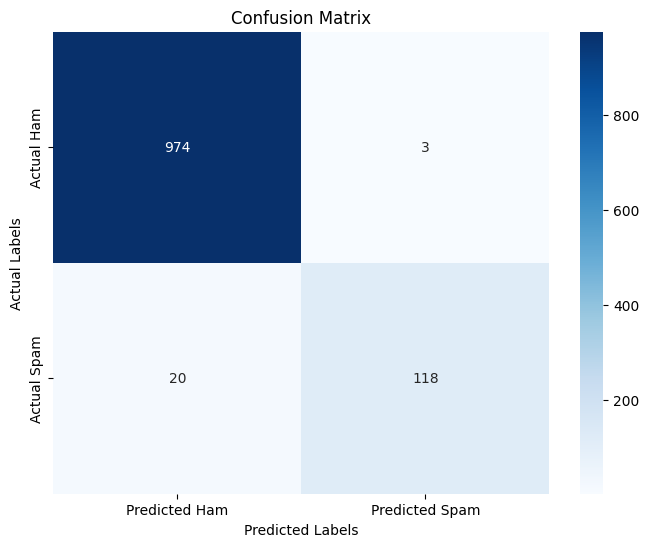

Performance Metrics:
 - Accuracy:  97.94%
 - Precision: 97.52%
 - Recall:    85.51%
 - F1 Score:  91.12%


In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

file_path = "/content/spam.csv"
df = pd.read_csv(file_path, encoding='Windows-1252')
message_X = df['Message']  # Email text column
labels_Y = df['Category']   # Label column

# Predict on the test set
y_pred = classifier.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Ham', 'Predicted Spam'], yticklabels=['Actual Ham', 'Actual Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Display performance metrics in a clearer format
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Performance Metrics:')
print(f' - Accuracy:  {accuracy * 100:.2f}%')
print(f' - Precision: {precision * 100:.2f}%')
print(f' - Recall:    {recall * 100:.2f}%')
print(f' - F1 Score:  {f1 * 100:.2f}%')


In [16]:
# Import necessary libraries and download all required nltk data resources
import nltk
nltk.download('punkt_tab')  # Download 'punkt' tokenizer for NLTK

from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/spam.csv"
df = pd.read_csv(file_path, encoding='Windows-1252')
message_X = df['Message']  # Email text column
labels_Y = df['Category']   # Label column

# Initialize stemmer
lstem = LancasterStemmer()

# Preprocess messages
def preprocess(messages):
    message_x = []
    for me_x in messages:
        # Filter out non-alphabet characters
        me_x = ''.join(filter(lambda mes: (mes.isalpha() or mes == " "), me_x))
        # Tokenize and stem words
        words = word_tokenize(me_x)
        message_x.append(' '.join([lstem.stem(word) for word in words]))
    return message_x

message_x = preprocess(message_X)

# Vectorization for machine learning
tfvec = TfidfVectorizer(stop_words='english')
x_new = tfvec.fit_transform(message_x).toarray()

# Encode labels (0 for ham, 1 for spam)
y_new = np.array(labels_Y.replace(to_replace=['ham', 'spam'], value=[0, 1]))

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, shuffle=True)

# Train SVM model
classifier = svm.SVC()
classifier.fit(x_train, y_train)

# Save the trained model and tf-idf vectorizer
with open("training_data.pkl", "wb") as file:
    pickle.dump({'classifier': classifier, 'tfidf': tfvec}, file)

# Function to classify a message
def classify_message(message):
    # Preprocess and vectorize the message
    processed_msg = tfvec.transform([message]).toarray()
    # Predict and return the result
    return "spam" if classifier.predict(processed_msg)[0] == 1 else "ham"

# Evaluation of model performance
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Example of classifying a new message
sample_message = "Congratulations! You've won a free ticket. Reply now to claim your prize!"
print(f"The message '{sample_message}' is classified as: {classify_message(sample_message)}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-16-cea8926076b2>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_new = np.array(labels_Y.replace(to_replace=['ham', 'spam'], value=[0, 1]))


Accuracy: 0.979372197309417
Precision: 0.9752066115702479
Recall: 0.855072463768116
F1 Score: 0.9111969111969112
The message 'Congratulations! You've won a free ticket. Reply now to claim your prize!' is classified as: spam


<ipython-input-19-b73de89618d1>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Category'].replace({'ham': 0, 'spam': 1})  # Encode labels as 0 (ham) and 1 (spam)


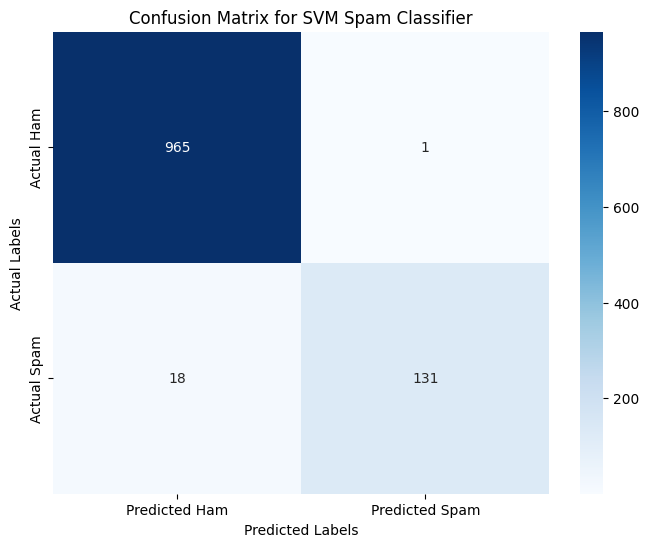

Performance Metrics:
 - Accuracy:  98.30%
 - Precision: 99.24%
 - Recall:    87.92%
 - F1 Score:  93.24%
The message 'Congratulations! You've won a free ticket. Reply now to claim your prize!' is classified as: spam


In [19]:
# Import necessary libraries
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/spam.csv"
df = pd.read_csv(file_path, encoding='Windows-1252')

# Separate features and labels
X = df['Message']  # Text column
y = df['Category'].replace({'ham': 0, 'spam': 1})  # Encode labels as 0 (ham) and 1 (spam)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train SVM model
svm_classifier = svm.SVC(kernel='linear', C=1.0)  # You can adjust C and kernel parameters as needed
svm_classifier.fit(X_train, y_train)

# Save the trained model and TF-IDF vectorizer
with open("svm_spam_model.pkl", "wb") as file:
    pickle.dump({'classifier': svm_classifier, 'tfidf': tfidf_vectorizer}, file)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Ham', 'Predicted Spam'], yticklabels=['Actual Ham', 'Actual Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for SVM Spam Classifier')
plt.show()

# Display performance metrics in a clearer format
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Performance Metrics:')
print(f' - Accuracy:  {accuracy * 100:.2f}%')
print(f' - Precision: {precision * 100:.2f}%')
print(f' - Recall:    {recall * 100:.2f}%')
print(f' - F1 Score:  {f1 * 100:.2f}%')

# Function to classify a new message
def classify_message(message):
    # Transform the message using the saved TF-IDF vectorizer
    processed_msg = tfidf_vectorizer.transform([message])
    # Predict and return the result
    return "spam" if svm_classifier.predict(processed_msg)[0] == 1 else "ham"

# Example of classifying a new message
sample_message = "Congratulations! You've won a free ticket. Reply now to claim your prize!"
print(f"The message '{sample_message}' is classified as: {classify_message(sample_message)}")
